In [ ]:
# see: https://www.databookuw.com/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

In [2]:
# Training and testing set sizes
n1 = 100 # Train
n2 = 50  # Test

# Random ellipse 1 centered at (0,0)
x = np.random.randn(n1+n2)
y = 0.5*np.random.randn(n1+n2)

# Random ellipse 2 centered at (1,-2)
x2 = np.random.randn(n1+n2) + 1
y2 = 0.2*np.random.randn(n1+n2) - 2

# Rotate ellipse 2 by theta
theta = np.pi/4
A = np.zeros((2,2))
A[0,0] = np.cos(theta)
A[0,1] = -np.sin(theta)
A[1,0] = np.sin(theta)
A[1,1] = np.cos(theta)

x3 = A[0,0]*x2 + A[0,1]*y2
y3 = A[1,0]*x2 + A[1,1]*y2

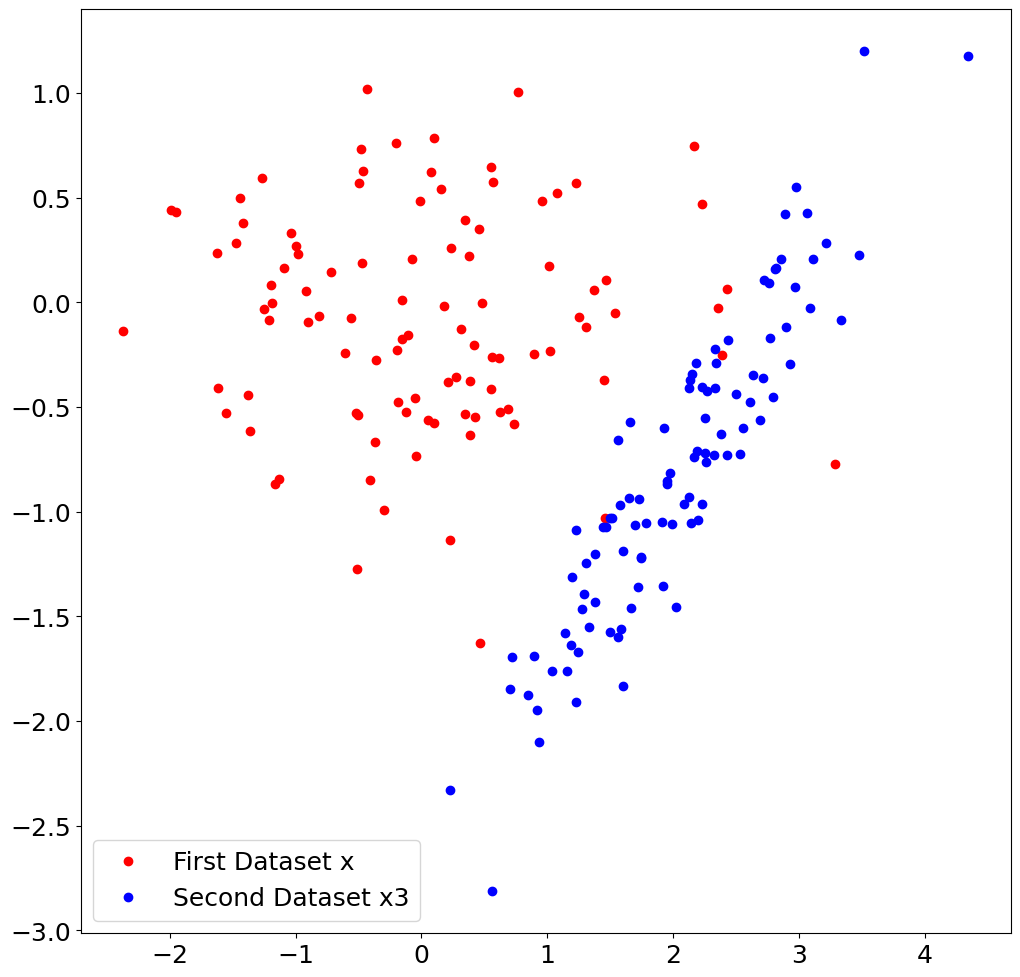

In [5]:
plt.figure()
plt.plot(x[:n1], y[:n1], 'ro', label='First Dataset x')  # 'ro' = red dots
plt.plot(x3[:n1], y3[:n1], 'bo', label='Second Dataset x3')  # 'bo' = blue dots
plt.legend()  # This displays the legend
plt.show()

In [8]:
# Training set: first 200 of 240 points
X1 = np.column_stack((x3[:n1],y3[:n1]))
X2 = np.column_stack((x[:n1],y[:n1]))

Y = np.concatenate((X1,X2))
Z = np.column_stack((np.ones(n1),2*np.ones(n1)))

# Test set: remaining 40 points
x1test = np.column_stack((x3[n1:],y3[n1:]))
x2test = np.column_stack((x[n1:],y[n1:]))


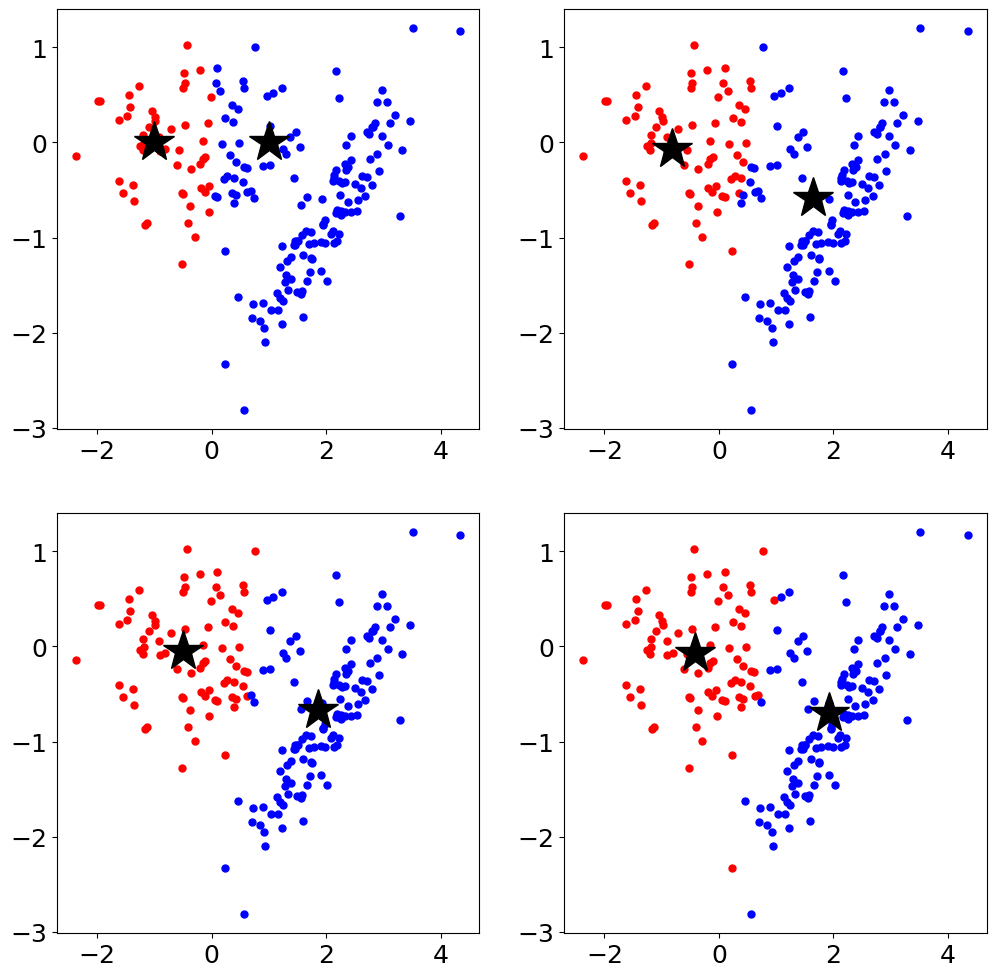

In [9]:
g1 = np.array([-1, 0]) # Initial guess
g2 = np.array([1, 0])
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)
for j in range(4):
    class1 = np.zeros((1,2))
    class2 = np.zeros((1,2))
    for jj in range(Y.shape[0]):
        d1 = np.linalg.norm(g1-Y[jj,:],ord=2)
        d2 = np.linalg.norm(g2-Y[jj,:],ord=2)
        if d1<d2:
            class1 = np.append(class1,Y[jj,:].reshape((1,2)),axis=0)
        else:
            class2 = np.append(class2,Y[jj,:].reshape((1,2)),axis=0)
    class1 = np.delete(class1, (0), axis=0) # remove zeros used to initialize
    class2 = np.delete(class2, (0), axis=0)
    
    axs[j].plot(class1[:,0],class1[:,1],'ro',ms=5)
    axs[j].plot(class2[:,0],class2[:,1],'bo',ms=5)
    axs[j].plot(g1[0],g1[1],'k*',ms=30)
    axs[j].plot(g2[0],g2[1],'k*',ms=30)
    
    g1 = np.array([np.mean(class1[:,0]),np.mean(class1[:,1])])
    g2 = np.array([np.mean(class2[:,0]),np.mean(class2[:,1])])
    
plt.show()

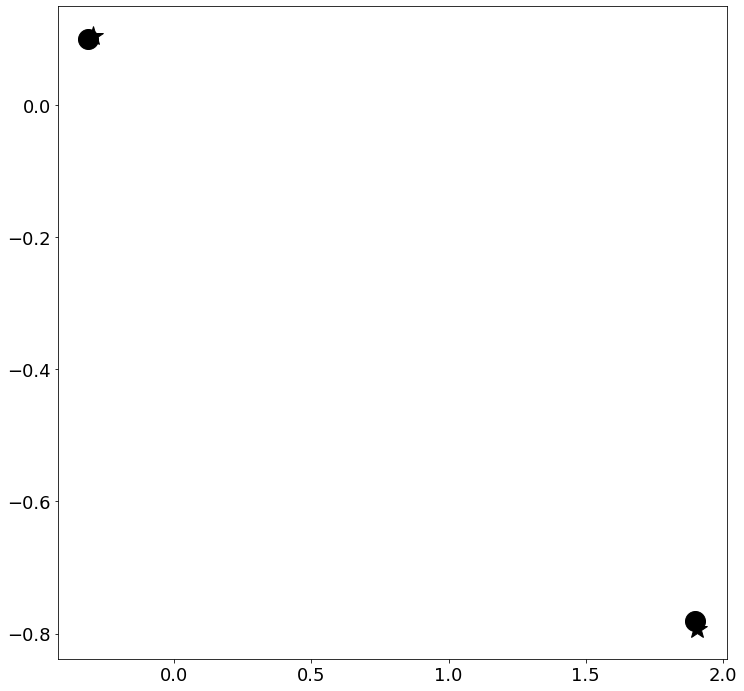

In [69]:
# kmeans code
kmeans = KMeans(n_clusters=2, random_state=0).fit(Y)
c = kmeans.cluster_centers_
ind = kmeans.labels_

# result from previous section
plt.plot(g1[0],g1[1],'ko',ms=20)
plt.plot(g2[0],g2[1],'ko',ms=20)

# kmeans result
plt.plot(c[0,0],c[0,1],'k*',ms=20)
plt.plot(c[1,0],c[1,1],'k*',ms=20)

plt.show()

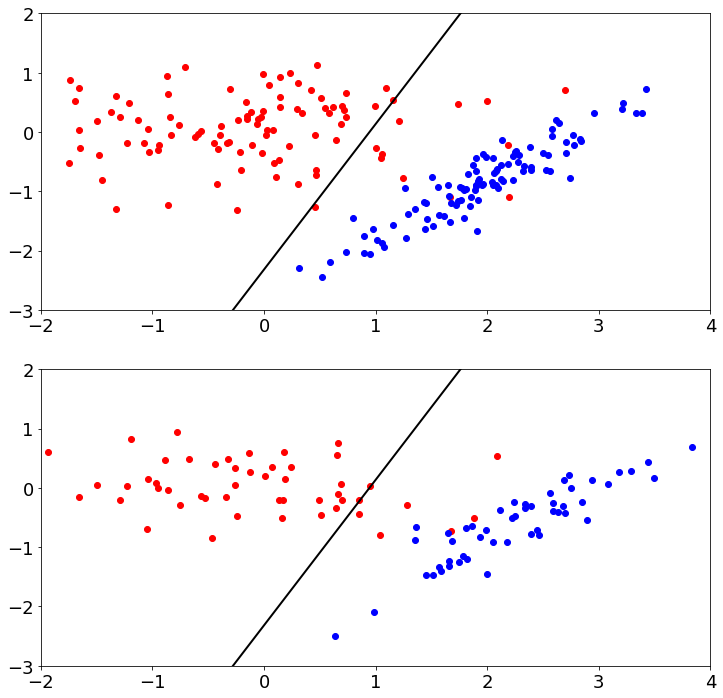

In [73]:
midx = (c[0,0]+c[1,0])/2
midy = (c[0,1]+c[1,1])/2
slope = (c[1,1]-c[0,1])/(c[1,0]-c[0,0]) # rise/run
b = midy+(1/slope)*midx
xsep = np.arange(-1,2,0.1)
ysep = -(1/slope)*xsep+b

fig,axs = plt.subplots(2)
axs[0].plot(x[:n1],y[:n1],'ro')
axs[0].plot(x3[:n1],y3[:n1],'bo')
axs[0].plot(xsep,ysep,c='k',LineWidth=2)
axs[0].set_xlim(-2,4)
axs[0].set_ylim(-3,2)

# error on test data

axs[1].plot(x[n1:],y[n1:],'ro')
axs[1].plot(x3[n1:],y3[n1:],'bo')
axs[1].plot(xsep,ysep,c='k',LineWidth=2)
axs[1].set_xlim(-2,4)
axs[1].set_ylim(-3,2)

plt.show()

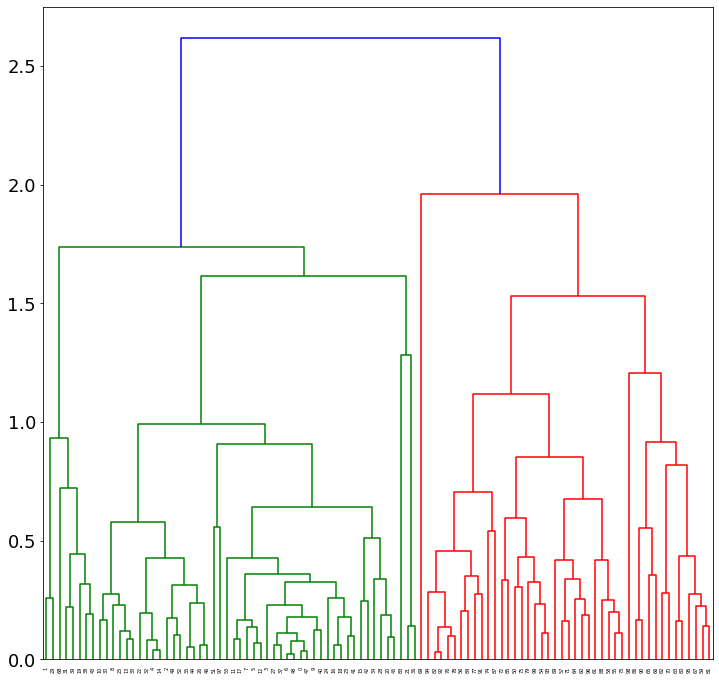

In [84]:
## Dendrograms

Y3 = np.concatenate((X1[:50,:],X2[:50,:]))

Y2 = pdist(Y3,metric='euclidean')
Z = hierarchy.linkage(Y2,method='average')
thresh = 0.85*np.max(Z[:,2])

plt.figure()
dn = hierarchy.dendrogram(Z,p=100,color_threshold=thresh)

plt.show()

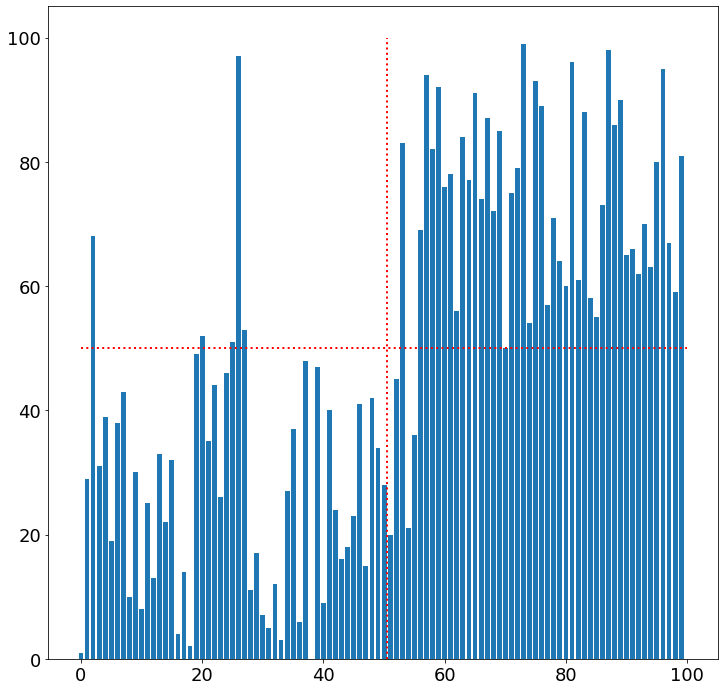

In [96]:
plt.bar(range(100),dn['leaves'])
plt.plot(np.array([0, 100]),np.array([50, 50]),'r:',LineWidth=2)
plt.plot(np.array([50.5, 50.5]),np.array([0, 100]),'r:',LineWidth=2)

plt.show()